In [1]:
import numpy as np
import matplotlib.pyplot as plt

# K means on synthetic dataset
Your task is to implement kmeans from scratch without using any library other than nummpy, and matplotlib. Wherever necessary sklearn codes will be hardcoded and do not require any modifications. No need to modify any cells other than the defining functions.

In [2]:
from sklearn.datasets._samples_generator import make_blobs
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
X,y

(array([[-1.82150565,  0.07098024],
        [ 2.16732621, -2.93199608],
        [ 0.8465158 , -3.26075305],
        ...,
        [ 3.29772603,  4.24400152],
        [-1.69503125, -0.29979681],
        [-1.64362141,  0.63035513]]),
 array([1, 2, 2, ..., 0, 1, 1]))

In [3]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

# Validate initialize centroids function
k = len(np.unique(y))  
centroids = initialize_centroids(X, k)
print("Initialized Centroids Shape:", centroids.shape)

Initialized Centroids Shape: (4, 2)


In [4]:
# Function to calculate Euclidean distance between two time series
def euclidean_distance(ts_a, ts_b):
    return np.sqrt(np.sum((ts_a - ts_b) ** 2))

In [5]:
# General compute_distances function
def compute_distances(X, centroids, distance_metric):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        for j in range(X.shape[0]):
            distances[j, i] = distance_metric(X[j], centroid)
    return distances

distances = compute_distances(X, centroids, euclidean_distance)
print("Distances computed:")
print(distances)

Distances computed:
[[6.85158316 4.80575695 2.49093749 1.35318702]
 [5.98995314 0.19027042 5.36079494 3.91950081]
 [6.90432455 1.28041433 4.14704654 3.48522393]
 ...
 [2.10767214 7.14814148 8.99260531 5.70280428]
 [6.87947335 4.48878653 2.26078065 1.25097632]
 [6.49883946 5.02692561 3.06415822 1.34684575]]


In [6]:
def assign_clusters(distances):
    return np.argmin(distances, axis=1)

# Test assign_clusters
labels = assign_clusters(distances)
print("Cluster labels assigned:")
print(labels)

Cluster labels assigned:
[3 1 1 ... 0 3 3]


In [7]:
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids

# Test update_centroids
new_centroids = update_centroids(X, labels, k)
print("Updated centroids:")
print(new_centroids)

Updated centroids:
[[ 3.80237253  3.75629212]
 [ 2.02128964 -2.96612807]
 [-2.53253872 -1.37982058]
 [ 0.03566396  0.43725785]]


In [8]:
def has_converged(old_centroids, centroids):
    return np.all(old_centroids == centroids)

# Test has_converged
converged = has_converged(centroids, new_centroids)
print("Has converged:")
print(converged)

Has converged:
False


In [9]:
def kmeans(X, k, max_iters=100,distance_metric=euclidean_distance):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids
        distances = compute_distances(X, centroids,distance_metric)
        labels = assign_clusters(distances)
        centroids = update_centroids(X, labels, k)
        if has_converged(old_centroids, centroids):
            break
    return labels, centroids

# Test kmeans end-to-end
# Run k-means on the training data
k = len(np.unique(y))  # Number of clusters
labels_train, centroids_train = kmeans(X, k)
assert labels_train.shape[0] == X.shape[0], "kmeans failed"
assert centroids_train.shape == (k, X.shape[1]), "kmeans failed"

In [14]:
centroids_train

array([[ 1.99741008, -3.01666822],
       [-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 3.97334234,  3.98758687]])

In [15]:
for i in range(k):
    print(centroids_train[i])

[ 1.99741008 -3.01666822]
[-2.03743147 -0.99782524]
[0.96900523 0.98370298]
[3.97334234 3.98758687]


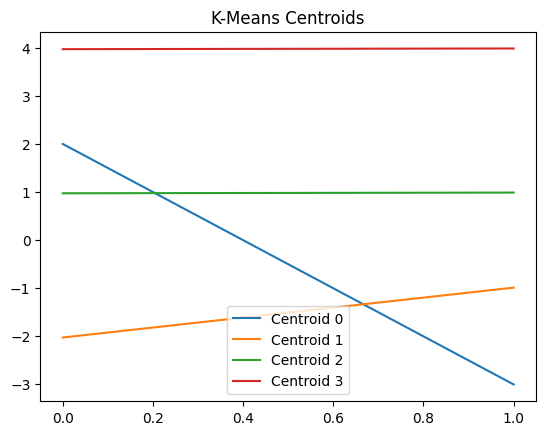

In [10]:
# Visualize the results
for i in range(k):
    plt.plot(centroids_train[i], label=f'Centroid {i}')
plt.title('K-Means Centroids')
plt.legend()
plt.show()

In [11]:
# Evaluate the clustering on the test data
distances_test = compute_distances(X, centroids_train,euclidean_distance)
labels_test = assign_clusters(distances_test)

In [12]:
def match_labels(y_true, y_pred,  num_classes):
    label_mapping = np.zeros(num_classes, dtype=int)
    
    for i in range(num_classes):
        # For each true label, find the most frequent predicted label
        mask = (y_true == i)
        pred_labels = y_pred[mask]
        most_common_label = np.bincount(pred_labels).argmax()
        label_mapping[i] = most_common_label
    
    # Create an array of mapped predictions
    y_pred_mapped = np.zeros_like(y_pred)
    for i in range(num_classes):
        y_pred_mapped[y_pred == label_mapping[i]] = i
    
    return y_pred_mapped

# Get the matched labels
y_pred_matched = match_labels(y, labels_test, k)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y, y_pred_matched)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9794


# Now, on time series data - You are free to explore kmeans++ and DTW for better accuracy

In [18]:
# Load the training data
data_train = np.loadtxt("ECGFiveDays/ECGFiveDays_TRAIN", delimiter=",")
X_train = data_train[:, 1:]  # All columns except the first one are the features (time series data)
y_train = data_train[:, 0].astype(np.int8) -1 # The first column is the label

# Load the test data
data_test = np.loadtxt("ECGFiveDays/ECGFiveDays_TEST", delimiter=",")
X_test = data_test[:, 1:]  # All columns except the first one are the features (time series data)
y_test = data_test[:, 0].astype(np.int8) -1 # The first column is the label

In [19]:
# Basic summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 23
Number of unique classes: 2
Time series length: 136


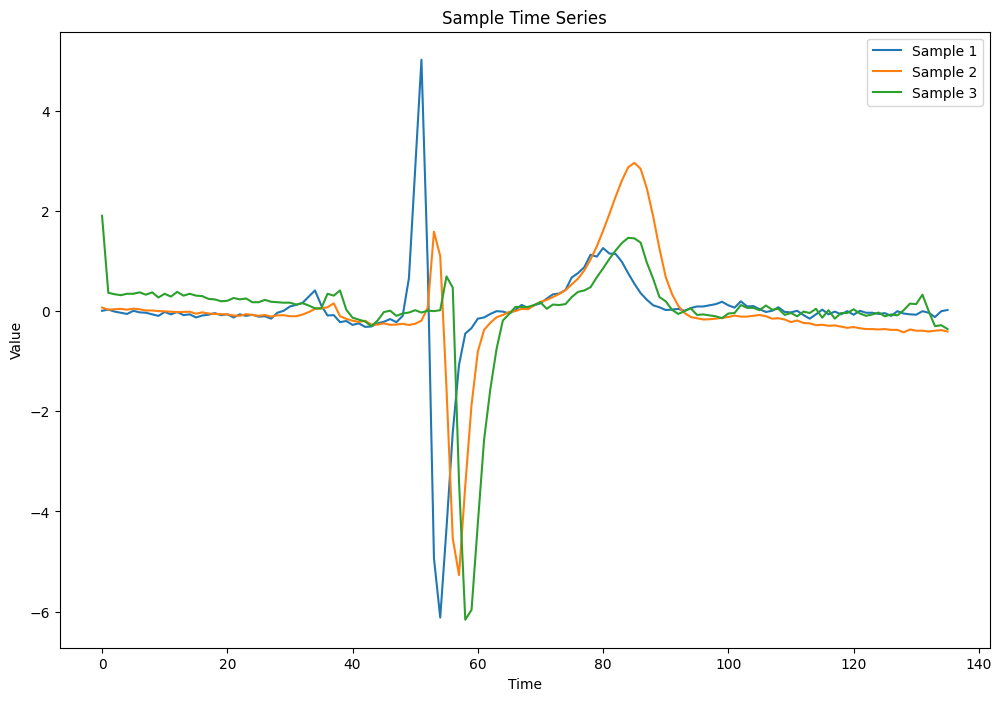

In [20]:
def plot_sample_time_series(data, num_samples=3):
    """Plot a few sample time series."""
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.plot(data[i], label=f'Sample {i+1}')
    plt.title('Sample Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_sample_time_series(X_train)

In [21]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

# Validate initialize centroids function
k = len(np.unique(y_train))  
centroids = initialize_centroids(X_train, k)
print("Initialized Centroids Shape:", centroids.shape)

Initialized Centroids Shape: (2, 136)


In [22]:
# Function to calculate DTW distance between two time series
def dtw_distance(ts_a, ts_b):
    M, N = len(ts_a), len(ts_b)
    dtw_matrix = np.zeros((M, N))

    # Initialize the DTW matrix
    dtw_matrix[0, 0] = np.abs(ts_a[0] - ts_b[0])
    for i in range(1, M):
        dtw_matrix[i, 0] = dtw_matrix[i-1, 0] + np.abs(ts_a[i] - ts_b[0])
    for j in range(1, N):
        dtw_matrix[0, j] = dtw_matrix[0, j-1] + np.abs(ts_a[0] - ts_b[j])

    # Populate the DTW matrix
    for i in range(1, M):
        for j in range(1, N):
            cost = np.abs(ts_a[i] - ts_b[j])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match

    return dtw_matrix[-1, -1]

In [23]:
# Function to calculate Euclidean distance between two time series
def euclidean_distance(ts_a, ts_b):
    return np.sqrt(np.sum((ts_a - ts_b) ** 2))

In [24]:
# General compute_distances function
def compute_distances(X, centroids, distance_metric):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        for j in range(X.shape[0]):
            distances[j, i] = distance_metric(X[j], centroid)
    return distances

distances = compute_distances(X_train, centroids, euclidean_distance)
print("Distances computed:")
print(distances)

Distances computed:
[[ 9.65248457 10.27460591]
 [15.04125739 12.53857657]
 [15.45810717 14.59634451]
 [ 6.47898755  6.58809326]
 [10.03696418  9.45859085]
 [ 6.55203323  8.5280021 ]
 [14.71687379 13.03083106]
 [16.42353727 14.43994921]
 [ 7.42354691  9.41546503]
 [12.5850994  11.67957911]
 [13.36419152 10.138633  ]
 [ 7.57848963  4.55031506]
 [ 8.42043369  4.18141134]
 [15.19358729 12.75909581]
 [ 5.25180403  6.90934396]
 [ 0.          7.574808  ]
 [ 7.574808    0.        ]
 [ 6.68776857  8.72023452]
 [16.77253364 14.40751146]
 [ 7.43543974  5.81322452]
 [14.67774534 11.73488252]
 [16.16062525 15.38546198]
 [ 9.94015144  7.85458502]]


In [25]:
def assign_clusters(distances):
    return np.argmin(distances, axis=1)

# Test assign_clusters
labels = assign_clusters(distances)
print("Cluster labels assigned:")
print(labels)

Cluster labels assigned:
[0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1]


In [26]:
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids

# Test update_centroids
new_centroids = update_centroids(X_train, labels, k)
print("Updated centroids:")
print(new_centroids)

Updated centroids:
[[ 1.71029057e-01  1.70464143e-01  1.90936629e-01  1.58048714e-01
   1.58306429e-01  1.58760486e-01  1.62149857e-01  1.43535857e-01
   1.13571000e-01  1.10070429e-01  1.04450429e-01  8.95854286e-02
   1.06001857e-01  8.37034286e-02  8.18361429e-02  7.06890000e-02
   7.43071429e-02  5.66107143e-02  7.78550000e-02  8.16067143e-02
   7.14646143e-02  5.08180571e-02  6.95727143e-02  5.19779857e-02
   7.74754286e-02  5.68394286e-02  5.99501857e-02  6.23437143e-02
   1.06610957e-01  1.43119771e-01  2.29837857e-01  2.53350286e-01
   3.10500000e-01  3.47442857e-01  2.49110143e-01  1.00232757e-01
  -6.06014286e-03 -4.80688571e-02 -7.95540000e-02 -9.68665143e-02
  -9.70091429e-02 -6.02518571e-02 -7.79461429e-02 -7.54340000e-02
  -4.62775714e-02 -4.01454286e-02 -2.18280000e-02  2.05967143e-02
   4.29344486e-01  1.42748286e+00  2.30375857e+00  9.18220000e-01
  -3.01842729e+00 -5.58912857e+00 -5.04890000e+00 -3.28358571e+00
  -1.78176714e+00 -8.37852857e-01 -3.72530000e-01 -1.4791

In [27]:
def has_converged(old_centroids, centroids):
    return np.all(old_centroids == centroids)

# Test has_converged
converged = has_converged(centroids, new_centroids)
print("Has converged:")
print(converged)

Has converged:
False


In [28]:
def kmeans(X, k, max_iters=100,distance_metric=euclidean_distance):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids
        distances = compute_distances(X, centroids,distance_metric)
        labels = assign_clusters(distances)
        centroids = update_centroids(X, labels, k)
        if has_converged(old_centroids, centroids):
            break
    return labels, centroids

# Test kmeans end-to-end
# Run k-means on the training data
k = len(np.unique(y_train))  # Number of clusters
labels_train, centroids_train = kmeans(X_train, k)
assert labels_train.shape[0] == X_train.shape[0], "kmeans failed"
assert centroids_train.shape == (k, X_train.shape[1]), "kmeans failed"

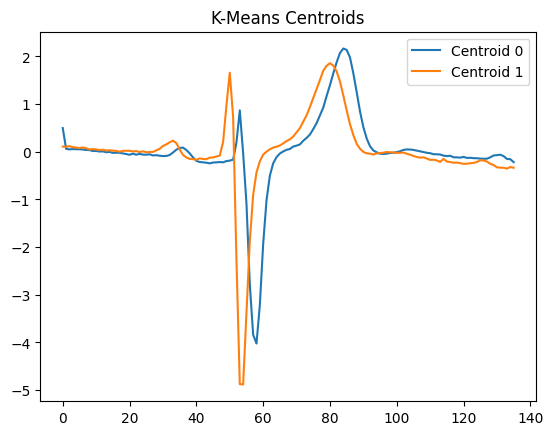

In [144]:
# Visualize the results
for i in range(k):
    plt.plot(centroids_train[i], label=f'Centroid {i}')
plt.title('K-Means Centroids')
plt.legend()
plt.show()

In [145]:
# Evaluate the clustering on the test data
distances_test = compute_distances(X_test, centroids_train,euclidean_distance)
labels_test = assign_clusters(distances_test)

# Calculate accuracy (not ideal for clustering, but for comparison with known labels)
accuracy = np.sum(labels_test == (y_test)) / len(y_test)
print(f'Clustering accuracy: {accuracy:.2f}')

Clustering accuracy: 0.49
